In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import gc 
import datetime 

%matplotlib inline
plt.style.use('ggplot')

#accesing data 
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'

zipresp = urlopen(zipurl) #new file on hdd
tempzip = open("tempfile.zip", "wb") #writing to a new file 
tempzip.write(zipresp.read())
tempzip.close()
zf = ZipFile("tempfile.zip")
zf.extractall(path = '')
zf.close()



In [2]:
%ls

 Volume in drive D is Bordello
 Volume Serial Number is EAB6-1FA0

 Directory of d:\Analiza Danych\E-commerce store

12.12.2020  14:34    <DIR>          .
12.12.2020  14:34    <DIR>          ..
03.01.2020  21:35           801�254 Case Study 2 - Retail Product Sales Analytics.ipynb
21.12.2020  21:14        45�580�638 ecommerce_data.csv
21.12.2020  20:22         1�111�953 Products Sales Analysis.ipynb
21.12.2020  21:14         7�453�387 tempfile.zip
               4 File(s)     54�947�232 bytes
               2 Dir(s)  112�273�412�096 bytes free


In [3]:
csv_file = r"ecommerce_data.csv"
df = pd.read_csv(csv_file, encoding= 'ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [9]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df_no_missing_values = df.dropna()

In [12]:
df_no_missing_values.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [13]:
df_no_missing_values.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df2 = df_no_missing_values.copy()

In [15]:
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


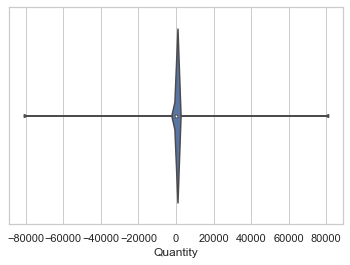

In [16]:
sns.set(style="whitegrid")
ax = sns.violinplot(x = df2['Quantity'])

In [17]:
df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


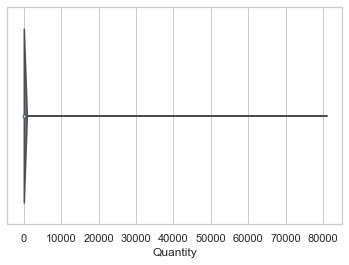

In [18]:
ax = sns.violinplot(x=df2.Quantity)

In [19]:
df2['AmountSpent'] = df2.Quantity * df.UnitPrice
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
# data columns handling and creation
df2["YearMonth"] = df2.InvoiceDate.dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [21]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [22]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   YearMonth    397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

In [24]:
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


## EDA

Exploratory Data Analysis

In [25]:
df2["CustmerID"] = df2["CustomerID"].astype(str)

In [26]:
sales_per_customer = df2.groupby(by=["CustomerID", "Country"], as_index=False)["Quantity"].sum().sort_values(by="Quantity", ascending=False)
sales_per_customer.columns = ['CustomerID', 'Country', "NumberOfSales"]


In [27]:
sales_per_customer.head()

,CustomerID,Country,NumberOfSales
1698,14646.0,Netherlands,197491
3017,16446.0,United Kingdom,80997
1888,14911.0,EIRE,80515
57,12415.0,Australia,77670
0,12346.0,United Kingdom,74215


In [28]:
 mean_quantity_per_customer = df2.groupby(['CustomerID','Country'],).Quantity.mean().sort_values(ascending = False)
 mean_quantity_per_customer.columns = ["CustomerID", "Country","MeanOfSales"]

In [29]:
mean_quantity_per_customer = pd.DataFrame(mean_quantity_per_customer)
mean_quantity_per_customer.head(10)

,,Quantity
CustomerID,Country,
12346.0,United Kingdom,74215.0
16446.0,United Kingdom,26999.0
13256.0,United Kingdom,12540.0
13135.0,United Kingdom,4300.0
16754.0,United Kingdom,2140.0
16308.0,United Kingdom,2000.0
18087.0,United Kingdom,1953.5
15749.0,United Kingdom,1802.8
14609.0,United Kingdom,1756.5


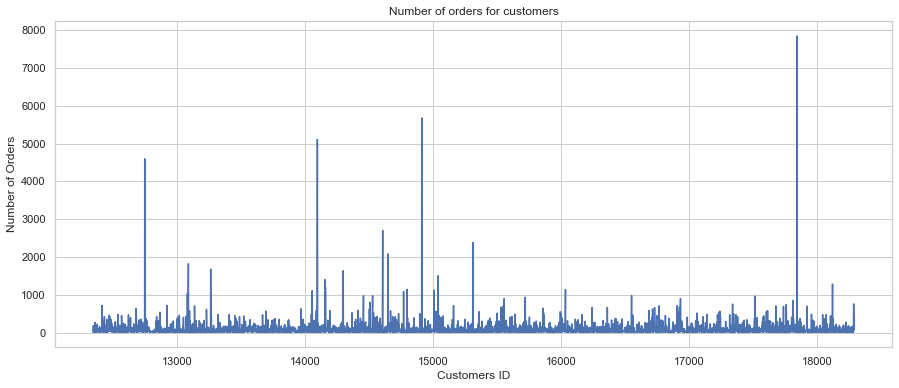

In [30]:
orders = df2.groupby(['CustomerID', 'Country'], as_index=False).InvoiceNo.count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel("Customers ID")
plt.ylabel("Number of Orders")
plt.title('Number of orders for customers')
plt.show()

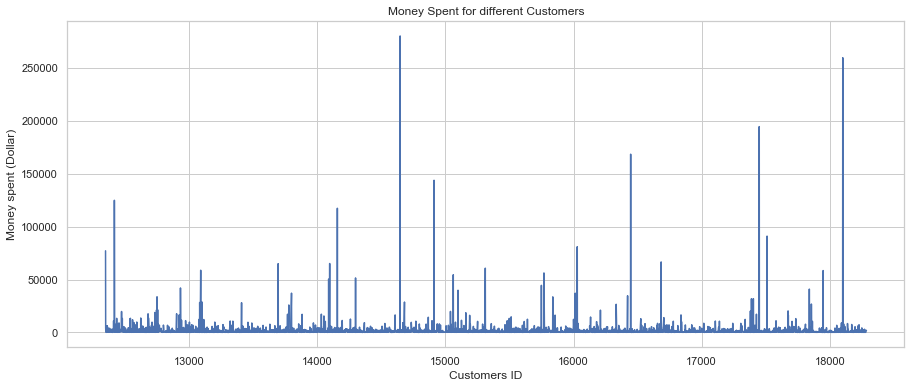

In [31]:
df2['AmountSpent'] = df2["Quantity"] * df2["UnitPrice"]
money_spent = df2.groupby(["CustomerID", "Country"], as_index=False).AmountSpent.sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [32]:
spent_per_customer = df2.groupby(["CustomerID", "Country"], as_index=False).AmountSpent.sum().sort_values(by="AmountSpent", ascending = False)

spent_per_customer.columns = ["CustomerID", "Country", "TotalSpent"]
spent_per_customer.head(5)

,CustomerID,Country,TotalSpent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


# Analysis by Country

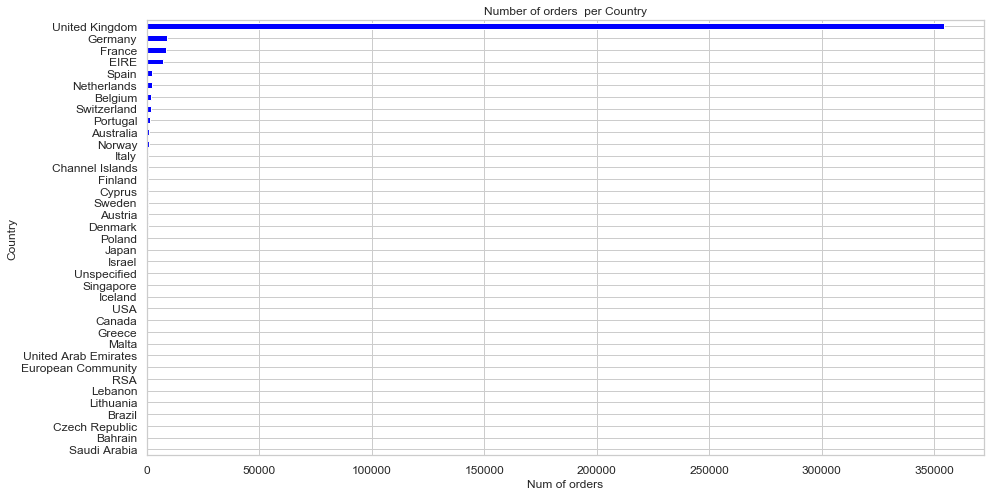

In [33]:
orders_per_country = df2.groupby('Country').InvoiceDate.count().sort_values()

plt.subplots(figsize=(15,8))
orders_per_country.plot(kind = 'barh', fontsize=12, color="blue")
plt.xlabel('Num of orders', fontsize=12)
plt.title('Number of orders  per Country', fontsize=12)
plt.show()

In [34]:
# UK needs to be excluded, takes up to much data -makes rest unreadable
orders_per_country_wo_UK = orders_per_country.copy()
del orders_per_country_wo_UK['United Kingdom']


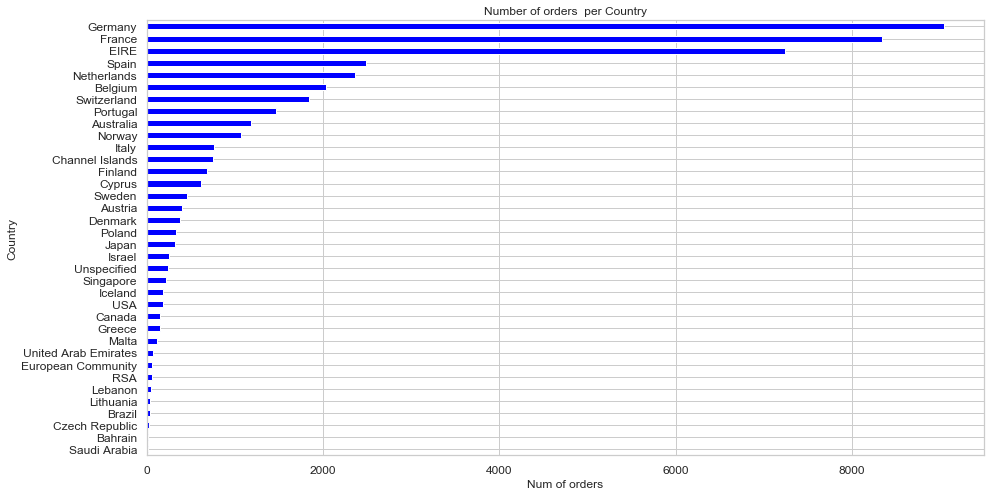

In [35]:
plt.subplots(figsize=(15,8))
orders_per_country_wo_UK.plot(kind = 'barh', fontsize=12, color="blue")
plt.xlabel('Num of orders', fontsize=12)
plt.title('Number of orders  per Country', fontsize=12)
plt.show()

In [36]:
amount_spent_per_country_wo_UK = df2.groupby('Country').AmountSpent.sum().sort_values()
del amount_spent_per_country_wo_UK['United Kingdom']

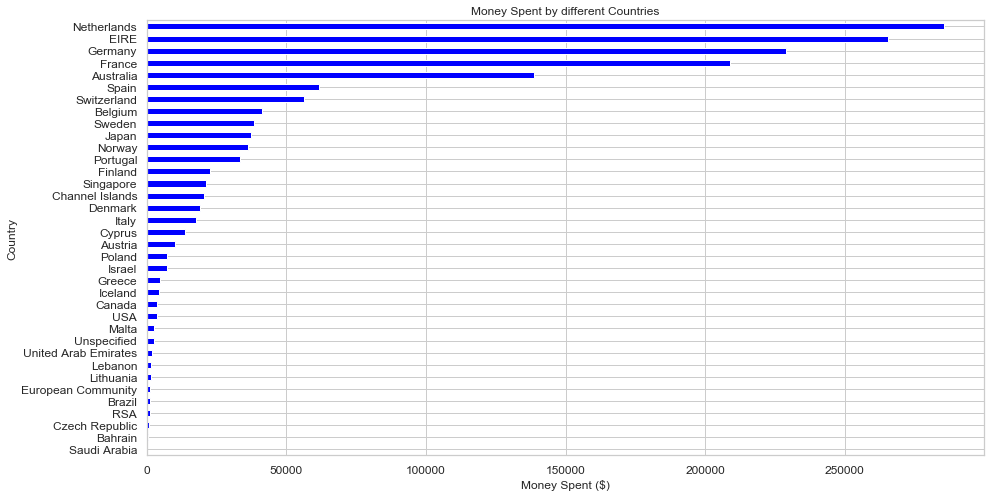

In [37]:
plt.subplots(figsize=(15,8))
amount_spent_per_country_wo_UK.plot(kind = 'barh', fontsize=12, color="blue")
plt.xlabel('Money Spent ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

# Item Trends

In [38]:
#Setting index of a data frame to the invoice date.
items_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq="M"),'StockCode']).Quantity.sum()
items_df.head(10)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
Name: Quantity, dtype: int64

In [39]:
#Instead of method chaining it could be done but overwriting the newly created DF.
last_months_ranking_of_items = items_df.loc['2011-11-30'].reset_index().sort_values(by = 'Quantity', ascending=False)
last_months_ranking_of_items.head()

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678


In [40]:
items_df = df2.loc[df['StockCode'].isin(['23084','84826','22197','22086','85099B'])].set_index("InvoiceDate").groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

items_df

InvoiceDate  StockCode
2010-12-31   22086         1697
             22197         2110
             84826          366
             85099B        2056
2011-01-31   22197         1697
             84826          480
             85099B        2625
2011-02-28   22086            2
             22197         2505
             84826           66
             85099B        2971
2011-03-31   22086           85
             22197         2034
             84826           60
             85099B        4924
2011-04-30   22086           11
             22197         1801
             84826            1
             85099B        2211
2011-05-31   22086           12
             22197         6738
             23084         1097
             85099B        3470
2011-06-30   22086          337
             22197         1989
             23084         1621
             84826            1
             85099B        3529
2011-07-31   22086          374
             22197         1787
             2308

In [41]:
#monthly trends

trending_items_over_time_M = items_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_items_over_time_M = trending_items_over_time_M.reset_index()
trending_items_over_time_M  = trending_items_over_time_M.set_index('InvoiceDate')
trending_items_over_time_M.columns  = trending_items_over_time_M.columns.droplevel(0)


trending_items_over_time_M

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1697.0,2110.0,0.0,366.0,2056.0
2011-01-31,0.0,1697.0,0.0,480.0,2625.0
2011-02-28,2.0,2505.0,0.0,66.0,2971.0
2011-03-31,85.0,2034.0,0.0,60.0,4924.0
2011-04-30,11.0,1801.0,0.0,1.0,2211.0
2011-05-31,12.0,6738.0,1097.0,0.0,3470.0
2011-06-30,337.0,1989.0,1621.0,1.0,3529.0
2011-07-31,374.0,1787.0,236.0,2.0,2970.0
2011-08-31,480.0,5286.0,1813.0,72.0,5278.0


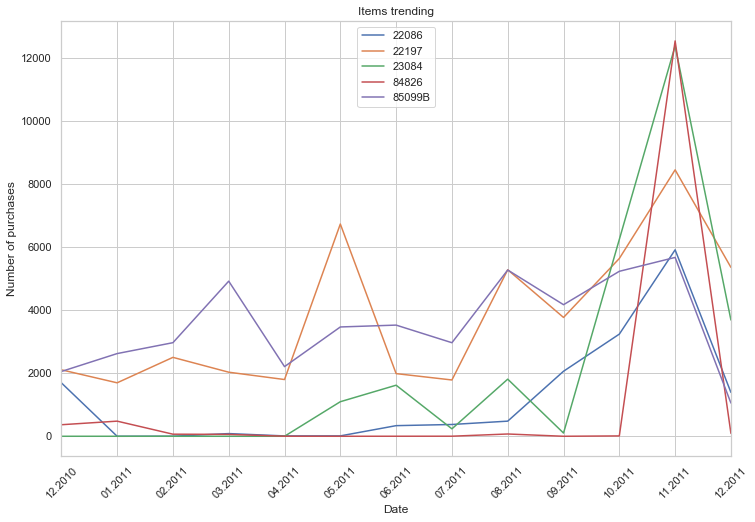

In [42]:
#Plotting the trend

ax = pd.DataFrame(trending_items_over_time_M).plot(figsize=(12,8), grid=True)
ax.set_ylabel("Number of purchases")
ax.set_xlabel('Date')
ax.set_title('Items trending')

ax.legend(trending_items_over_time_M.columns, loc='upper center')

plt.xticks(ticks=trending_items_over_time_M.index,labels=trending_items_over_time_M.index.strftime("%m.%Y") ,rotation = 45 )

plt.show()

# Purchasing Patterns

In [43]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth,year,month,day,dayofweek,dayofyear,weekofyear,quarter,CustmerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0


In [44]:
# inserting a new column  by concatenating year and month value from InvoiceDate cokumn
df2.insert(loc=2, column="year_month", value=df["InvoiceDate"].map(lambda x: 100*x.year + x.month))

In [45]:
df2

,InvoiceNo,StockCode,year_month,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth,year,month,day,dayofweek,dayofyear,weekofyear,quarter,CustmerID
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,17850.0
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4,17850.0
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,201112,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,2011,12,9,5,343,49,4,12680.0
541905,581587,22899,201112,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,2011,12,9,5,343,49,4,12680.0
541906,581587,23254,201112,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011,12,9,5,343,49,4,12680.0
541907,581587,23255,201112,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011,12,9,5,343,49,4,12680.0


In [46]:
#Doing the same but with extracted hour from column
df2.insert(loc=5, column="hour", value=df2['InvoiceDate'].dt.hour)

In [47]:
df2.head(2)

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth,year,month,day,dayofweek,dayofyear,weekofyear,quarter,CustmerID
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,17850.0
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,17850.0


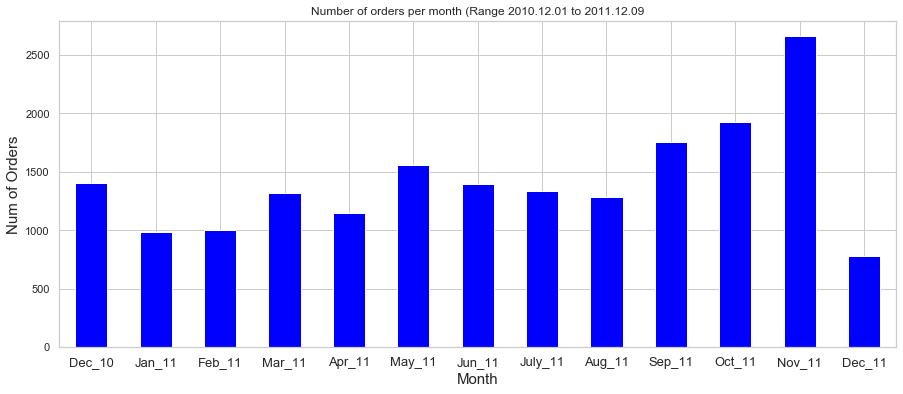

In [48]:
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel("Month", fontsize=15)
ax.set_ylabel("Num of Orders", fontsize=15)
ax.set_title("Number of orders per month (Range 2010.12.01 to 2011.12.09")
ax.set_xticklabels(("Dec_10","Jan_11","Feb_11","Mar_11", "Apr_11","May_11","Jun_11","July_11","Aug_11","Sep_11","Oct_11","Nov_11","Dec_11"), rotation = 'horizontal', fontsize=13)
plt.show()

 Nov 11 significantly higher then others.
<br> Lets investigate Number of sales within  days of week

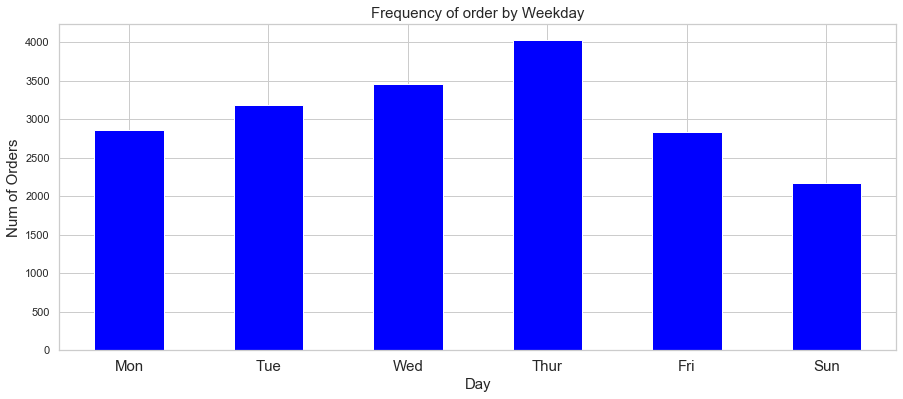

In [104]:
InvoiceDate = df2.groupby(['InvoiceNo'])['dayofweek'].unique()
ax = InvoiceDate.value_counts().sort_index().plot(kind="bar",color="blue", figsize=(15,6))
ax.set_xlabel("Day",fontsize=15)
ax.set_ylabel("Num of Orders", fontsize=15)
ax.set_title("Frequency of order by Weekday", fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# No orders on Saturday

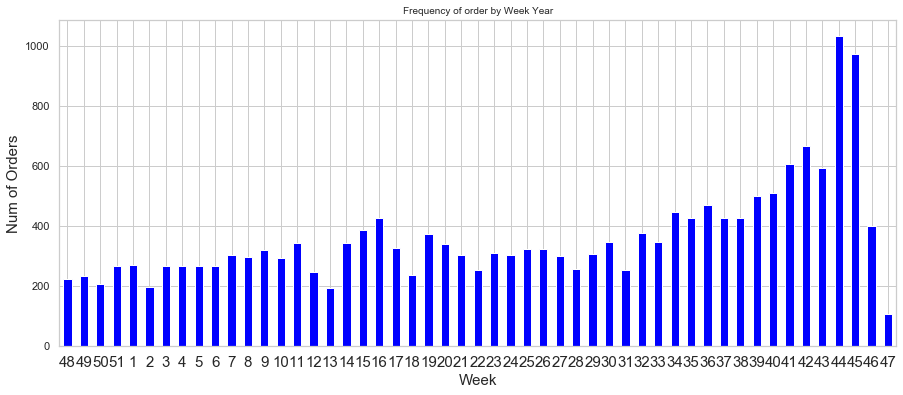

In [121]:
InvoiceDate = df2.groupby(['InvoiceNo'])['weekofyear'].unique()
ax = InvoiceDate.value_counts().sort_index().plot(kind="bar",color="blue", figsize=(15,6))
ax.set_xlabel("Week",fontsize=15)
ax.set_ylabel("Num of Orders", fontsize=15)
ax.set_title("Frequency of order by Week Year", fontsize=10)
ax.set_xticklabels(labels=df2["weekofyear"].unique() ,rotation='horizontal',fontsize=15)
plt.show()


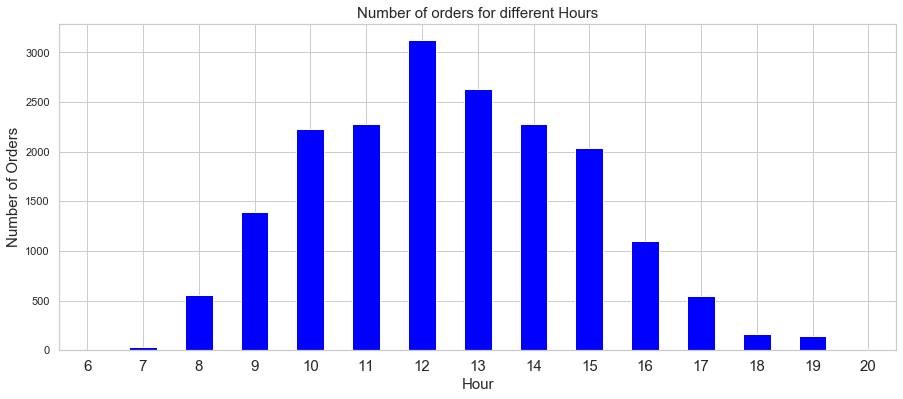

In [126]:
# Let's Plot the  number of orders per hour
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color="blue",figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()